# Ejercicio 1: Problema de Bandidos

En esta seccion estudiaremos las diferentes manera de seleccionar acciones que fueron vistas en clases:

- Seleccion golosa
- $\epsilon$-greedy
- softmax

Utilizaremos la siguiente clase que permite simular un problema de bandidos




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng()

class Bandit:
    """
    n-armed bandit.
    """
    def __init__(self, nb_actions, mean=0.0, std_Q=1.0, std_r=1.0):
        """
        :param nb_actions: numbero de acciones
        :param mean: promedio de la distribucion normal desde la cual se obtiene $Q^*$.
        :param std_Q: desviación estándar de $Q^*$.
        :param std_r: desviación estándar de las recompensas muestreadas.
        """
        # Almacenar parámetros
        self.nb_actions = nb_actions
        self.mean = mean
        self.std_Q = std_Q
        self.std_r = std_r

        # Inicializar los valores de Q reales (desconocidos para el agente)
        self.Q_star = rng.normal(self.mean, self.std_Q, self.nb_actions)

        # Acción óptima
        self.a_star = self.Q_star.argmax()

    def step(self, action):
        """
        Obtener una muestra del bandido

        :param action: la acción seleccionada.
        :return: la recompensa.
        """
        return float(rng.normal(self.Q_star[action], self.std_r, 1))



**Pregunta 1:** Cree un bandido con 5 acciones y por cada acción obtenga 10 muestras. Luego grafique el promedio de recompensa de cada acción y compare con los valores reales. Aumente la cantidad de muestras a 1000 y vuelva a realizar la comparación.

C:\Users\Harunomi\AppData\Local\Temp\ipykernel_10404\3628562260.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(rng.normal(self.Q_star[action], self.std_r, 1))


<BarContainer object of 5 artists>

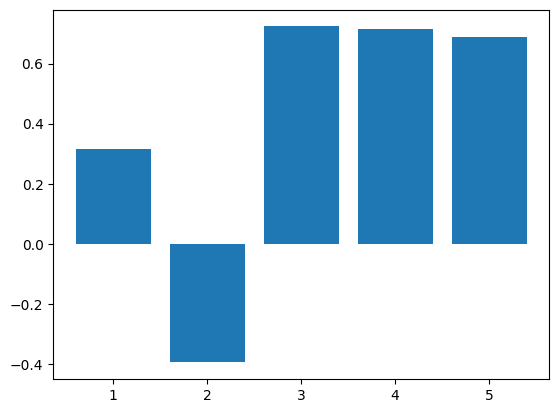

In [24]:
import random
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng()

class Bandit:
    """
    n-armed bandit.
    """
    def __init__(self, nb_actions, mean=0.0, std_Q=1.0, std_r=1.0):
        """
        :param nb_actions: numbero de acciones
        :param mean: promedio de la distribucion normal desde la cual se obtiene $Q^*$.
        :param std_Q: desviación estándar de $Q^*$.
        :param std_r: desviación estándar de las recompensas muestreadas.
        """
        # Almacenar parámetros
        self.nb_actions = nb_actions
        self.mean = mean
        self.std_Q = std_Q
        self.std_r = std_r

        # Inicializar los valores de Q reales (desconocidos para el agente)
        self.Q_star = rng.normal(self.mean, self.std_Q, self.nb_actions)

        # Acción óptima
        self.a_star = self.Q_star.argmax()

    def step(self, action):
        """
        Obtener una muestra del bandido

        :param action: la acción seleccionada.
        :return: la recompensa.
        """
        return float(rng.normal(self.Q_star[action], self.std_r, 1))

n_actions = 5
bandit = Bandit( n_actions, 0.3, 0.5, 0.34)
Q_reward = []
muestras = 1000
for i in range(n_actions):
    results = []
    for j in range(muestras):
        results.append(bandit.step(i))
    Q_reward.append(np.mean(results))

x = [i for i in range(1,n_actions+1)]

plt.bar(x,Q_reward)

En la seleccion golosa, siempre escogemos la acción con el valor máximo de Q (o aleatoriamente si hay un empate):

$a_t = argmax_a Q(a)$

Podemos mantener estimaciones de los valores de Q de la siguiente forma:

$Q_{t+1}(a_t) = Q_t + \alpha(r_t - Q_t(a_t))$

Estos valores deben ser actualizados después de ejecutar cada acción $a_t$ y recibir la recompensa $r_t$.

**Pregunta 2:** Implemente la seleccion golosa de acciones.

El algoritmo debe

1. Crear un bandido de 5 brazos (media 0 y varianza 1)
2. Crear un arreglo para las estimaciones de Q e iniciar los valores en 0.
3. Simular 100 jugadas en las que deberá:
- Seleccionar una acción de manera goloza usando las estimaciones actuales
- Obtener una muestra usando la acción seleccionada
- Actualizar los valores de Q de la acción seleccionada

Sugerencia: Para implementar argmax no utilizar np.argmax() ya que si hay algún empate x.argmax() siempre retorna el índice de la primera ocurrencia. Para implementar una acción aleatoria en caso de empate:

a = rng.choice(np.where(x == x.max())[0])

Almacene y cree un gráfico con las recompensas recibidas.

In [ ]:
# Escriba aqui su código

**Pregunta 3:** Vuelva a correr su algoritmo con multiples valores diferentes para Q* (simplemente cree un nuevo Bandido) y observe

- Cuanta recompensa obtiene
- Cuanto difieren los valores estimados de Q de los reales.
- Si la seleccion golosa converge en la acción óptima.

**Pregunta 4:** Cree una clase que implemente un agente goloso GreedyAgent que tome el bandido y la tasa de aprendizaje como argumento  

In [ ]:
class GreedyAgent:

    def __init__(self, bandit, alpha):

        self.bandit = bandit
        self.alpha = alpha

        # Estimated Q-values
        self.Q_t = np.zeros(self.bandit.nb_actions)

    def act(self):

        action = #...
        return action

    def update(self, action, reward):

        self.Q_t[action] += #...


    def train(self, nb_steps):

        rewards = []

        for step in range(nb_steps):

            # Seleccionar la acción
            action = self.act()

            # Obtener la muestra de recompensa
            reward = self.bandit.step(action)

            # Almacenar la recompensa
            rewards.append(reward)

            # Actualizar los valores Q
            self.update(action, reward)

        return np.array(rewards)

**Pregunta 5:** Modifique el método train() para que retorne una lista de valores binatios que indiquen si el agente escogio la acción óptima. Ejecute una simulación como las anteriores y observe cuantas veces el agente escogio la acción óptima.

In [ ]:
#Escriba aqui su código

**Pregunta 6:** Corra el proceso de aprendizaje 200 veces (nuevos bandidos y agente en cada proceso) y promedie los resultados. Dele un nombre único a cada arreglo ya que los usaremos después (por ejemplo rewards_greedy o optimal_greedy). Compare los resultados con lo visto en clases.

In [ ]:
#Escriba aqui su código

# Seleccion ϵ-greedy

La seleccion golosa no explora: en cuanto encuentre una acción con un valor positivo seguirá escogiendo siempre la misma acción. El valor estimado de la acción escogida sera correcto pero todas las otras acciones se mantendrán en 0.

En la selección ϵ-greedy, acciones con menores valores son escogidas con un probabilidad pequeña:

$\pi(a) = \begin{cases} 1-\epsilon & \text{si a=a*}\\ \frac{\epsilon}{|A-1|} & \text{en otro caso} \end{cases}$

**Pregunta 7:** Cree un agente ϵ-greedy y repita el experimento anterior. No borre los arreglos anteriores para así poder comparar ambos métodos en un mismo gráfico.

El agente debe:

- Determinar la acción golosa​
- Obtener un número aleatorio entre 0 y 1 (rng.random()).
Si este número es menor que ϵ entonces seleccionar otra accion aleatoria entre las restantes (rng.choice()).


In [ ]:
class EpsilonGreedyAgent(GreedyAgent):

    def __init__(self, bandit, alpha, epsilon):

        self.epsilon = epsilon

        self.actions = np.arange(bandit.nb_actions)

        super().__init__(bandit, alpha)

    def act(self):

        action = #...

        return action

nb_actions = 5

# Tasa de aprendizaje
alpha = 0.1

# Epsilon para la exploracion
epsilon = 0.1

rewards_egreedy = []
optimal_egreedy = []

for trial in range(200):

    bandit = Bandit(nb_actions)

    agent = EpsilonGreedyAgent(bandit, alpha, epsilon)

    rewards, optimal = agent.train(1000)

    rewards_egreedy.append(rewards)
    optimal_egreedy.append(optimal)

rewards_egreedy = np.mean(rewards_egreedy, axis=0)
optimal_egreedy = np.mean(optimal_egreedy, axis=0)

# Plot the Q-values and the evolution of rewards
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(rewards_greedy, label="Greedy")
plt.plot(rewards_egreedy, label="$\epsilon$-Greedy")
plt.legend()
plt.xlabel("Plays")
plt.ylabel("Reward")
plt.subplot(122)
plt.plot(optimal_greedy, label="Greedy")
plt.plot(optimal_egreedy, label="$\epsilon$-Greedy")
plt.legend()
plt.xlabel("Plays")
plt.ylabel("Optimal")
plt.show()



# Seleccion softmax

En esta estrategia los valores de Q son transformados en una distribución de las probabilidades sobre las acciones:

$\pi(s) = \frac{exp Q(a)/\tau}{\sum_b exp Q(b)/\tau}$

En la práctica para valores muy grandes de Q o si la temperatura es muy pequeña los valores de $expQ(a)/\tau$ pueden crear problemas numéricos. Para evitar esto usamos la siguiente fórmula:

$\pi(s) = \frac{exp \frac{Q_t(a)-max_aQ_t(a)}{\tau}}{\sum_b  \frac{Q_t(b)-max_aQ_t(a)}{\tau}}$

$Q_t(a)-max_aQ_t(a)$ es siempre negativo por lo que el exponencial siempre esta entre 0 y 1.

**Pregunta 8:** Implemente un agente con selección softmax (con $\tau=0.5$) y compare con el agente goloso y el $\epsilon$-greedy. Cambie la temperatura y determine el mejor valor. Concluya.

Sugerencia: para escoger acciones usar action = rng.choice(self.actions, p=proba_softmax)

In [ ]:
class SoftmaxAgent(GreedyAgent):

    def __init__(self, bandit, alpha, tau):
        self.tau = tau

        # List of actions
        self.actions = np.arange(bandit.nb_actions)

        # Call the constructor of GreedyAgent
        super().__init__(bandit, alpha)

    def act(self):

        action = #...
        return action

nb_actions = 5

alpha = 0.1

tau = 0.1

rewards_softmax = []
optimal_softmax = []

for trial in range(200):

    bandit = Bandit(nb_actions)

    agent = SoftmaxAgent(bandit, alpha, tau)

    rewards, optimal = agent.train(1000)

    rewards_softmax.append(rewards)
    optimal_softmax.append(optimal)

rewards_softmax = np.mean(rewards_softmax, axis=0)
optimal_softmax = np.mean(optimal_softmax, axis=0)

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(rewards_greedy, label="Greedy")
plt.plot(rewards_egreedy, label="$\epsilon$-Greedy")
plt.plot(rewards_softmax, label="Softmax")
plt.legend()
plt.xlabel("Plays")
plt.ylabel("Reward")
plt.subplot(122)
plt.plot(optimal_greedy, label="Greedy")
plt.plot(optimal_egreedy, label="$\epsilon$-Greedy")
plt.plot(optimal_softmax, label="Softmax")
plt.legend()
plt.xlabel("Plays")
plt.ylabel("Optimal")
plt.show()